# Data Mining Consulting

## Profesor: Daniel Alfredo Chavez Gallo
------------------------------------------------------------------------------------------------------------------------------

### Preparacion de datos

In [1]:
import pandas as pd

# Importar de la libreria
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
datos = pd.read_excel('data/Datos_Cluster.xlsx', sheet_name = "Data")

In [3]:
datos.shape

(2813, 79)

In [4]:
datos.head(2)

NUMPERIODO CLIENTE  RENTA_BASICA  NUM_LINEAS  CLI_CLARO  CLI_MOVISTAR  \
0      201811  C01527    135.423736           3          4             1   
1      201812  C02318    433.368500          19          0             0   

   CTD_PROD_OTROS  CTD_PROD_MERC  PENALIDAD  ANTIGUEDAD  ...  \
0              12             20     222.82          12  ...   
1               0             21     451.94           2  ...   

   NUMTRAFICOTOTAL_54M  NUMTRAFICOWHATSAPP_64M  NUMTRAFICOMAILILIMITADO_64M  \
0         -9464.459891             -649.554148                   -13.048521   
1         -7518.641312              495.370740                   549.516180   

   NUMTRAFICOPAGADO_64M  NUMTRAFICOTOTAL_64M  NUMTRAFICOTOTAL_65M  \
0           -600.228238         -1271.409971          8193.049920   
1           2017.837700          4549.940134         12068.581446   

   EQUIPOS_PRE  ENDEUDA_PRE  RESULTADO_PRE  RIESGO_MORO_PRE  
0           15         1125       APROBADO               NO  
1            8          600       APROBADO               NO  

[2 rows x 79 columns]

In [6]:
# Retiramos las variables cualitativas, recordar que pueden ser transformadas a dummies para su uso (transformacion se vio en la sesion 2 de este curso)
var = list(datos.columns.drop(['NUMPERIODO','CLIENTE','RESULTADO_PRE','RIESGO_MORO_PRE']))

In [7]:
datos[var]

RENTA_BASICA  NUM_LINEAS  CLI_CLARO  CLI_MOVISTAR  CTD_PROD_OTROS  \
0       135.423736           3          4             1              12   
1       433.368500          19          0             0               0   
2       161.864410          10          3             0               0   
3       487.276611          21          0             0               0   
4        97.288198           4          0             0               0   
...            ...         ...        ...           ...             ...   
2808    428.780000          26          0             0              19   
2809    508.044788          13          5             0               0   
2810    457.600000          19          0             0               0   
2811    259.320000          23          0             0              10   
2812   1067.110382          23          0             3               0   

      CTD_PROD_MERC  PENALIDAD  ANTIGUEDAD  DEUDA_EQ  NUMMINUTOSENTRANTE_6M  \
0                20     222.82          12     0.000              852.00000   
1                21     451.94           2   720.000             1807.11674   
2                20     333.18           2   643.552             1956.14980   
3                22    4178.69           1  6197.219             1560.00000   
4                 5      85.91          10     0.000                0.00000   
...             ...        ...         ...       ...                    ...   
2808             45       0.00           6  3141.980             2350.06670   
2809             19     717.08           0   359.982             3846.01650   
2810             19    1844.28           8  1540.000             4421.00000   
2811             33       0.00           0     0.000             5924.56630   
2812             26    1224.04           4  6285.216                0.00000   

      ...  NUMMINUTOSALIENTE_54M  NUMTRAFICOPAGADO_54M  NUMTRAFICOTOTAL_54M  \
0     ...            -151.816700          -8780.503801         -9464.459891   
1     ...             441.583200          -8404.601956         -7518.641312   
2     ...            -307.483335           3188.977412          1187.835702   
3     ...           -1589.050002          -9473.180511         57470.645523   
4     ...            -254.816667          10655.974239         10868.697519   
...   ...                    ...                   ...                  ...   
2808  ...            1358.000000          -1942.661355         -1369.045873   
2809  ...            -397.000000          -1080.236308         -2242.078121   
2810  ...            -786.866468          -3876.801812          -200.377223   
2811  ...               0.000000              0.000000             0.000000   
2812  ...            2263.000000          51746.074678         60449.472888   

      NUMTRAFICOWHATSAPP_64M  NUMTRAFICOMAILILIMITADO_64M  \
0                -649.554148                   -13.048521   
1                 495.370740                   549.516180   
2                  59.975632                   197.484379   
3                -154.796784                   367.370268   
4                5337.975986                  2296.240450   
...                      ...                          ...   
2808             3656.335064                  2098.738115   
2809             -128.385793                   -48.120099   
2810              711.914361                 -1185.431921   
2811            -3270.641500                 -1242.843573   
2812             2929.726563                    57.951627   

      NUMTRAFICOPAGADO_64M  NUMTRAFICOTOTAL_64M  NUMTRAFICOTOTAL_65M  \
0              -600.228238         -1271.409971          8193.049920   
1              2017.837700          4549.940134         12068.581446   
2              6124.292838          6512.786854          5324.951152   
3             -8841.232991        -11059.517502            31.123621   
4             53293.287506         70444.695148         30858.530051   
...                    ...                

In [8]:
# Base cluster
datos_clus = datos[var]

In [9]:
# funcion python que ejecuta la estandarización
from sklearn.preprocessing import StandardScaler

datos_clus_scala = StandardScaler().fit_transform(datos_clus)

In [10]:
datos_clus_scala

array([[-1.01590839, -1.46644037,  1.96347253, ...,  0.32384236,
         0.51721476,  0.62905001],
       [-0.34681288,  0.31075679, -0.45079836, ...,  0.61431482,
        -0.257329  , -0.13401832],
       [-0.95653048, -0.68891661,  1.3599048 , ...,  0.10887734,
        -0.257329  , -0.13401832],
       ...,
       [-0.29239612,  0.31075679, -0.45079836, ...,  0.34950862,
         0.29591654,  0.41103048],
       [-0.73767415,  0.75505608, -0.45079836, ..., -0.51807303,
         0.51721476,  0.62905001],
       [ 1.07638329,  0.75505608, -0.45079836, ..., -0.29022964,
        -0.92122364, -0.8752847 ]])

### Componentes principales

In [11]:
# Calculamos el máximo número de componentes (Nro variables = Nro máximo de componentes)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(datos_clus_scala)
pca.explained_variance_ratio_

array([4.54269167e-01, 8.78212929e-02, 5.73727423e-02, 4.37598374e-02,
       3.36338807e-02, 2.65777902e-02, 2.54437569e-02, 2.45920848e-02,
       2.15159886e-02, 1.97126264e-02, 1.80708276e-02, 1.49255206e-02,
       1.35317646e-02, 1.31607426e-02, 1.20699495e-02, 1.17104808e-02,
       1.10827120e-02, 1.02171234e-02, 9.96805666e-03, 9.19786002e-03,
       8.39407478e-03, 7.71607124e-03, 5.50046094e-03, 5.46701295e-03,
       5.11761268e-03, 4.53625783e-03, 3.83727091e-03, 3.02811307e-03,
       2.88932009e-03, 2.57157598e-03, 2.37897686e-03, 2.06774175e-03,
       1.97829011e-03, 1.75446498e-03, 1.60298656e-03, 1.48518890e-03,
       1.45163399e-03, 1.33614223e-03, 1.32048746e-03, 1.20171346e-03,
       1.14419504e-03, 1.05379383e-03, 1.03497934e-03, 9.47316010e-04,
       9.29137910e-04, 8.56303975e-04, 8.12742356e-04, 7.47015031e-04,
       6.88408022e-04, 6.06905310e-04, 5.89166297e-04, 5.31125248e-04,
       4.93206386e-04, 4.75877853e-04, 4.47673508e-04, 4.04083615e-04,
      

In [12]:
# Aplicamos las componentes y visualizamos los resultados
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)

% Var. explicada (1 componentes):  45.42691668693865
% Var. explicada (2 componentes):  54.209045981659145
% Var. explicada (3 componentes):  59.94632021026693
% Var. explicada (4 componentes):  64.32230395041609
% Var. explicada (5 componentes):  67.68569202395098
% Var. explicada (6 componentes):  70.34347103978804
% Var. explicada (7 componentes):  72.887846727689
% Var. explicada (8 componentes):  75.34705520943659
% Var. explicada (9 componentes):  77.49865407104798
% Var. explicada (10 componentes):  79.46991671072504
% Var. explicada (11 componentes):  81.27699947524742
% Var. explicada (12 componentes):  82.76955153529212
% Var. explicada (13 componentes):  84.12272799553912
% Var. explicada (14 componentes):  85.43880225808782
% Var. explicada (15 componentes):  86.64579721236116
% Var. explicada (16 componentes):  87.81684529271023
% Var. explicada (17 componentes):  88.92511649515265
% Var. explicada (18 componentes):  89.94682883666306
% Var. explicada (19 componentes):  90

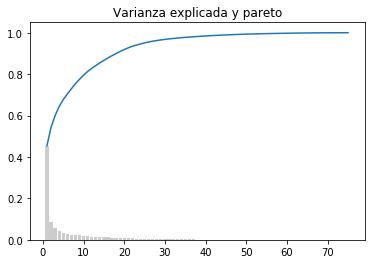

In [19]:
from matplotlib import pyplot as plt
# En esta gráfica observamos que podemos explicar la data con 6 componentes. Lo cual se observa en el resultado previo
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Varianza explicada y pareto")
plt.show()

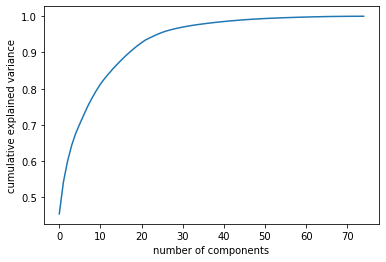

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Cluster Jerárquico

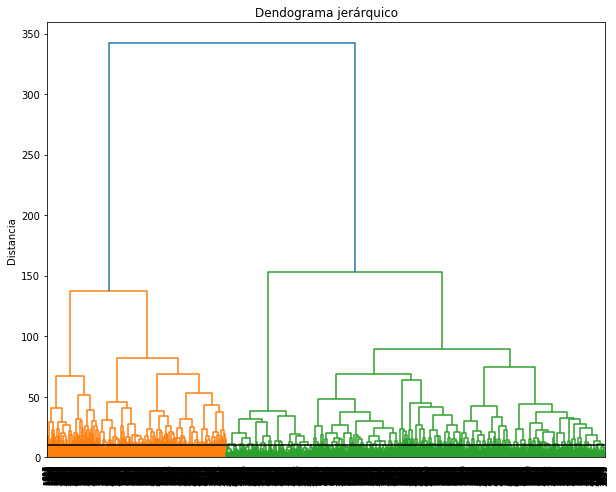

In [20]:
# Mostrando el dendograma con el numero optimo de cluster

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Z = linkage(datos_clus_scala, 'ward')

plt.figure(figsize=(10, 8))
plt.title('Dendograma jerárquico')
plt.ylabel('Distancia')
max_d = 10

dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()

In [ ]:
# Aplicando cluster Jerárquico, segun la gráfica previa la mayor distancia se obtienen en la parte izquierda del cluster
# esta distincia esta por encima de 150. Es aqui donde hacemos un corte horizontal adicional si deseamos mas grupos.

# Al realizar esta linea horizontal podemos obtener por lo menos 4 grupos
clustering = AgglomerativeClustering().fit(datos_clus_scala)

clus_je = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',                        
                        linkage='ward', n_clusters=4, # cuantos grupos?, segun el criterio descrito lineas arriba, 
                        pooling_func='deprecated')    # seria por lo menos 4 grupos.
y_clus_je = clus_je.fit_predict(datos_clus_scala)

In [ ]:
# Los grupos
y_clus_je

In [ ]:
# Otra gráfica de grupos
plt.scatter(datos_clus_scala[y_clus_je == 0, 0], datos_clus_scala[y_clus_je == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(datos_clus_scala[y_clus_je == 1, 0], datos_clus_scala[y_clus_je == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(datos_clus_scala[y_clus_je == 2, 0], datos_clus_scala[y_clus_je == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(datos_clus_scala[y_clus_je == 3, 0], datos_clus_scala[y_clus_je == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(datos_clus_scala[y_clus_je == 4, 0], datos_clus_scala[y_clus_je == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters')
plt.xlabel('....')
plt.ylabel('....')
plt.legend()
plt.show()

### KMEAN

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# importamos los dos métodos, kameans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Text(0.5, 1.0, 'NUMERO DE CLUSTERS')

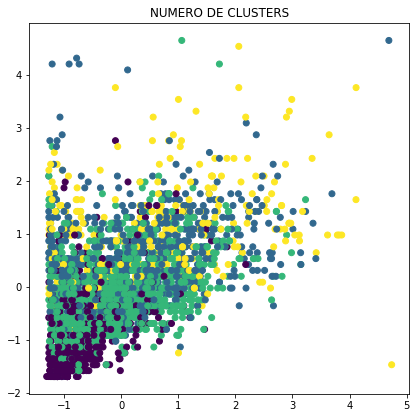

In [23]:
# Tomando 4 grupos, como referencia lo hecho en el jerarquico
y_pred = KMeans(n_clusters = 4, random_state=170).fit_predict(datos_clus_scala)

plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.scatter(datos_clus_scala[:, 0], datos_clus_scala[:, 1], c=y_pred)
plt.title("NUMERO DE CLUSTERS")


### DBSCAN

In [ ]:
# Número de puntos mínimos (muestra)
numSam = range(4, 15)
dbscan = [DBSCAN(eps=6, min_samples=i) for i in numSam]
dbscan
modDbscan = [dbscan[i].fit(datos_clus_scala) for i in range(len(dbscan))]
modDbscan
cluster = [modDbscan[i].labels_ for i in range(len(dbscan))] 
silhou  = [metrics.silhouette_score(datos_clus_scala, cluster[i]) for i in range(len(dbscan))] 

plt.plot(numSam,silhou)
plt.xlabel('Muestra')
plt.ylabel('Silueta')
plt.title('Parámetro DBSCAN')
plt.show()

In [ ]:
# Nos fijamos de los indicadores de Clustering:

for i in range(len(numSam)):
    print('* Posición Nro: '+str(i+1))
    print(str(numSam[i])+' puntos mínimos:')
    print('Ctd clúster: '+str(len(set(cluster[i]))))
    print('Silueta: '+str(silhou[i]))
    print("\n")

In [ ]:
# Computar DBSCAN
db = DBSCAN(eps=6, min_samples=4).fit(datos_clus_scala)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de grupos en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
n_clusters_

In [ ]:
# Plot resultado
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_clus_scala[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_clus_scala[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Sistema Recomendador

#### Caso:
El caso consiste que hoy en dia muchas entidades bancarias suelen gestionar sus campañas en base a cluster, sin embargo, apereció una necesidad en realizar campañas más personalizadas, donde a un grupo de clientes de un mismo cluster no necesariamente les puede gustar algunos decuentes que se les ofrece en común.

Por tanto, se pide desarrollar un sistema recomendador a nivel de establecimientos comerciales (nivel más a detalle) para los clientes que consumen con sus tarjetas de crédito y/o débito.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataFramePre = pd.read_csv("data/03dataBaseRecom.txt",delimiter='|', encoding='latin-1')
print(dataFramePre.head())

codmes  cliente  codComercio       edad      ingreso grupoGiro  \
0  201611     6545          518  [2. <=30]  [4. <=3500]   restbar   
1  201701      534         6919  [7. > 55]  [4. <=3500]   restbar   
2  201611     7725         1032  [1. <=25]  [2. <=1500]   restbar   
3  201701     5215          518  [5. <=45]  [3. <=2500]   restbar   
4  201611      695         4486  [6. <=55]  [4. <=3500]   restbar   

          comercio             distEstab     direcestab  monto  trx  
0  00000518kfc 106                  lima  00000518cabo      33    1  
1  00006919la anto     magdalena del mar  00006919juan      39    1  
2  00001032bembos          independencia  00001032alfre     12    1  
3  00000518kfc 106                  lima  00000518cabo      39    1  
4  00004486mc dona  san juan de luriganc  00004486proce     31    1  


In [10]:
dataFramePre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111725 entries, 0 to 111724
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   codmes       111725 non-null  int64 
 1   cliente      111725 non-null  int64 
 2   codComercio  111725 non-null  int64 
 3   edad         107142 non-null  object
 4   ingreso      101073 non-null  object
 5   grupoGiro    111725 non-null  object
 6   comercio     111725 non-null  object
 7   distEstab    111725 non-null  object
 8   direcestab   111725 non-null  object
 9   monto        111725 non-null  int64 
 10  trx          111725 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.4+ MB


In [11]:
# ---------------------------------------
# Construcción de Data Set [User - Item]
# ---------------------------------------

# Base de datos suma de monto y trx total por cliente:
copy = pd.DataFrame()
copy = dataFramePre
tempMontoTot = pd.DataFrame()
tempMontoTot['montoTot'] = copy.groupby('cliente').agg('monto').sum()
tempMontoTot['trxTot'] = copy.groupby('cliente').agg('trx').sum()
tempMontoTot = tempMontoTot.reset_index()


# Base de datos suma de monto y trx total por cliente y comercio:
copy = pd.DataFrame()
copy = dataFramePre
tempMontoComercio = pd.DataFrame() 
tempMontoComercio['montoComercio'] = copy.groupby(['cliente','codComercio']).agg('monto').sum()
tempMontoComercio['trxComercio'] = copy.groupby(['cliente','codComercio']).agg('trx').sum()
tempMontoComercio = tempMontoComercio.reset_index()

print('****************************')
print('  Dimensiones User - Item')
print('****************************')

cliUn = tempMontoTot.shape[0]
comUn = tempMontoComercio['codComercio'].drop_duplicates().shape[0]
dimDb = tempMontoComercio.shape
print('1. Clientes únicos: '+str(cliUn))
print('2. Comercios únicos: '+str(comUn))
print('3. DataSet Cliente X Comercio: '+str(dimDb)+'\n')
print(tempMontoComercio.columns)

****************************
  Dimensiones User - Item
****************************
1. Clientes únicos: 10483
2. Comercios únicos: 17618
3. DataSet Cliente X Comercio: (79179, 4)

Index(['cliente', 'codComercio', 'montoComercio', 'trxComercio'], dtype='object')


In [12]:
# ------------------------
# Construyendo el Ranking
# ------------------------

## Cálculo de Peso del userXitem en base al monto y transacción por cliente - comercio:
dbMerge = pd.merge(tempMontoComercio, tempMontoTot, on = 'cliente', how = 'left')
dbMerge['preRating'] = (dbMerge['montoComercio']/dbMerge['montoTot'])*(dbMerge['trxComercio']/dbMerge['trxTot'])

# Creación del "Rating Final" a una escala de [0-1]
copy = pd.DataFrame()
copy = dbMerge
tempRatingTot = pd.DataFrame()
tempRatingTot['sumaPreRat'] = copy.groupby('cliente').agg('preRating').sum()
tempRatingTot = tempRatingTot.reset_index()

dataBaseInputPre = pd.merge(dbMerge, tempRatingTot, on='cliente', how='left')
dataBaseInputPre['rating'] = dataBaseInputPre['preRating']/dataBaseInputPre['sumaPreRat']

# Base de Datos Final de Recomendación:
dataBaseInputPre = dataBaseInputPre[['cliente','codComercio','rating']]
dataBaseInputPre = dataBaseInputPre.sort_values('cliente')
dataBaseInputPre.head()

cliente  codComercio    rating
0         1         5529  1.000000
20        2         2369  0.909338
21        2         2660  0.000105
22        2         2692  0.000112
23        2         2695  0.000887

#### Analisis previo

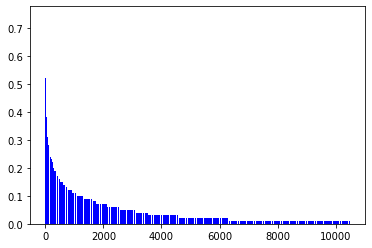

In [13]:
copy = pd.DataFrame()
copy = dataBaseInputPre
indCliente = pd.DataFrame()

indCliente['ctdComer'] = copy.groupby('cliente').size()
indCliente['pctComer'] = round(100*indCliente['ctdComer']/comUn,2)
indCliente = indCliente.sort_values('pctComer', ascending=False)

fig = plt.figure() # Figure
ax = fig.add_subplot(111) # Axes
plt.bar(range(len(indCliente.index)),indCliente['pctComer'],color='blue')
plt.show()

In [ ]:
copy = pd.DataFrame()
copy = dataBaseInputPre
indComer = pd.DataFrame()

indComer['ctdCli'] = copy.groupby('codComercio').size()
indComer['pctCli'] = round(100*indComer['ctdCli']/cliUn,2)
indComer = indComer.sort_values('pctCli', ascending=False)

fig = plt.figure() # Figure
ax = fig.add_subplot(111) # Axes
plt.bar(range(len(indComer.index)),indComer['pctCli'],color='blue')
plt.show()

Dado los gráficos, elegimos los filtros de clientes y comercios de IMPORTANCIA para mi análisis

In [ ]:
# Filtro de Clientes:
filCli = indCliente[indCliente['pctComer']>=0.025].reset_index()
filCli = filCli['cliente']
# Filtro de Comercios:
filComer = indComer[indComer['pctCli']>=0.025].reset_index()
filComer = filComer['codComercio']

print('Clientes únicos: '+str(filCli.shape[0]))
print('Comercios únicos: '+str(filComer.shape[0]))

Acotamos nuestra base de datos luego de determinar nuestros filtros para las categorías: "User" - "Items"

In [ ]:
dataBaseInput = dataBaseInputPre[dataBaseInputPre['cliente'].isin(list(filCli))]
dataBaseInput = dataBaseInput[dataBaseInput['codComercio'].isin(list(filComer))]
print('Dimensión del Dataset Final: '+str(dataBaseInput.shape[0])+'\n')
dataBaseInput.head()

#### Asignacion de puntuaciones

In [ ]:
# En base a la frecuencia user - item puntuará con una etiqueta (categórica)
dbInputFinal = dataBaseInput

copy = pd.DataFrame()
copy = dbInputFinal

dbInputFinal['cliente'] = copy['cliente'].astype("category")
dbInputFinal['codComercio'] = copy['codComercio'].astype("category")

dbInputFinal['clienteId'] = dbInputFinal['cliente'].cat.codes
dbInputFinal['codComercioId'] = dbInputFinal['codComercio'].cat.codes

#### Muestra Training - Testing

In [ ]:
# Training - Testing:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dbInputFinal, test_size=0.3)
# reseteamos los índices:
train = train.reset_index()
test = test.reset_index()

#### Modelamiento

In [ ]:
# En caso no tenga la  version Visual C++ mayor a 14.0, descargar en: https://visualstudio.microsoft.com/visual-cpp-build-tools/
# python -m pip install --user --upgrade pip (en caso la versión "pip" no sea mayor o igual a 18.0)
# Debemos importar el package "implicit" en el Terminal de la notebook
# python -m pip inst`all implicit
import scipy.sparse as sparse
import implicit

In [ ]:
# Convertimos nuestra base de datos en matriz tipo "sparse" 
dbItemUser = sparse.csr_matrix((train['rating'],(train['clienteId'],train['codComercioId'])))
dbUserItem = sparse.csr_matrix((train['rating'],(train['codComercioId'],train['clienteId'])))

In [ ]:
users_items = dbItemUser.T.tocsr()

In [ ]:
# Convertimos en lista combinada a nuestro "User vs Item"
lista = []
for i in range(train.shape[0]):
    temp = [train.loc[i,'clienteId'],train.loc[i,'codComercioId']]
    lista.append(temp)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Extraemos la predicción de la combinación "User vs Item"
rmse = [0.0]
difRmse = [0.0]
for numIter in range(1,7):
    pred = []
    model = implicit.als.AlternatingLeastSquares(factors=10, regularization=0.0001, iterations=numIter)
    model.fit(dbItemUser)
    
    for item, user in lista:
        valor = model.explain(user,users_items,item)
        pred.append(valor[0])
    
    rating = list(train['rating'])
    calrmse = sqrt(mean_squared_error(rating,pred))
    dif = abs(calrmse-rmse[numIter-1])
    rmse.append(calrmse)
    difRmse.append(dif)
    
    print('Nro Iteración: '+str(numIter))
    print('Dif-RMSE: '+str(dif)+'   RMSE: '+str(calrmse))

# Gráfico de RMSE:
plt.plot(difRmse[1:])
plt.title("Evolutivo RMSE")
plt.show()

#### Evaluacion

In [ ]:
numIter = int(input('El número de iteraciones es: '))
model = implicit.als.AlternatingLeastSquares(factors=10, regularization=0.0001, iterations=numIter)
model.fit(dbItemUser)

In [ ]:
# Convertimos en lista combinada a nuestro "User vs Item"
def evaluateRecom(df,model):
    lista = []
    pred = []
    for i in range(df.shape[0]):
        temp = [df.loc[i,'clienteId'],df.loc[i,'codComercioId']]
        lista.append(temp)
    
    for item, user in lista:
        valor = model.explain(user,users_items,item)
        pred.append(valor[0])
    
    rating = list(df['rating'])
    calrmse = sqrt(mean_squared_error(rating,pred))
    calmse = mean_squared_error(rating,pred)
    return calrmse, calmse, pred

In [ ]:
print("********************************")
print("          Evaluación")
print("********************************")
print(" ")
print("* Indicador Predicción Training:")
rsme, mse, pred = evaluateRecom(train,model)
print('Root-mean-square error (RMSE) = '+str(rsme))
print('Mean-square error (MSE) = '+str(mse))
print(" ")
print("* Indicador Predicción Testing:")
rsme, mse, pred = evaluateRecom(test,model)
print('Root-mean-square error (RMSE) = '+str(rsme))
print('Mean-square error (MSE) = '+str(mse))
print(" ")
print("Predicciones basados en la base de datos de test:")
test['prediction'] = pd.DataFrame(pred)
test.head()

#### Resultados

In [ ]:
numRec = int(input('¿Cuántas recomendaciones desea?: '))

In [ ]:
clientes = set(list(dbInputFinal['clienteId']))
user = []
recom = []

for i in clientes:
    recommendations = model.recommend(i, users_items,N=numRec)
    user = user + numRec*[i]
    recom = recom + recommendations

df = pd.DataFrame()
df[['clienteId']]=pd.DataFrame(user)
df[['codComercioId',"score"]]=pd.DataFrame(recom)    
df.head()

#### Información de Gestión

In [ ]:
# Importante: las variables no deben tener formato "categoría"
# Base de Datos de Recomendaciones:

clienteOrig = dbInputFinal[['clienteId','cliente']].drop_duplicates()
clienteOrig['cliente'] = clienteOrig['cliente'].astype('int')
comerOrig = dbInputFinal[['codComercioId','codComercio']].drop_duplicates()
comerOrig['codComercio'] = comerOrig['codComercio'].astype('int')
dataComer = dataFramePre[['codComercio','grupoGiro','comercio','direcestab']].drop_duplicates()

dbOuputFinal = pd.DataFrame()
dbOuputFinal = pd.merge(df,clienteOrig, on = 'clienteId', how='left')
dbOuputFinal = pd.merge(dbOuputFinal,comerOrig, on = 'codComercioId', how='left')
dbOuputFinal = pd.merge(dbOuputFinal,dataComer, on = 'codComercio', how='left')
dbOuputFinal = dbOuputFinal[['cliente','codComercio','grupoGiro','comercio','direcestab','score']]

print('\n*********************************************')
print('        NUEVO SISTEMA RECOMENDADOR - DMC' )
print('          Establecimientos Comerciales')
print('*********************************************')

dbOuputFinal.head()

In [ ]:
# Consulta de consumo Original:
cliente= 2

consulta = pd.merge(dataBaseInputPre,dataComer, on='codComercio',how='left')
consulta = consulta[consulta['cliente']==cliente].sort_values('rating',ascending=False)
consulta.head()